# Library

In [121]:
# import library
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Read LAD

In [122]:
polygon = gpd.read_file('./LAD/Local_Authority_Districts_(May_2021)_UK_BFE/LAD_MAY_2021_UK_BFE_V2.shp')

In [123]:
england = pd.read_excel('England_class.xlsx')

In [124]:
england_poly = pd.merge(england, polygon, left_on='LAD', right_on='LAD21CD', how='left')

In [125]:
england_poly_geo = gpd.GeoDataFrame(england_poly, crs="EPSG:27700", geometry=england_poly['geometry'])

In [126]:
england_poly_geo

,LAD,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry
0,E06000001,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,E06000002,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,E06000003,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52..."
3,E06000004,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,E06000005,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,E12000007,London,England,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
346,E12000008,South East,England,South East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
347,E12000009,South West,England,South West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
348,E13000001,Inner London,England,London,E13000001,Inner London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


# England water

In [127]:
df = pd.read_csv('./Water/2021-M.csv')

In [128]:
df = df.drop(columns=['@id', 'sample.samplingPoint','sample.samplingPoint.label',
                 'determinand.definition','resultQualifier.notation',
                 'codedResultInterpretation.interpretation','sample.isComplianceSample','sample.purpose.label'])

In [129]:
df

,sample.samplingPoint.notation,sample.sampleDateTime,determinand.label,determinand.notation,result,determinand.unit.label,sample.sampledMaterialType.label,sample.samplingPoint.easting,sample.samplingPoint.northing
0,AN-01M02,2021-05-24T10:43:00,O Diss %sat,9901,93.900,%,RIVER / RUNNING SURFACE WATER,463800,241400
1,AN-01M02,2021-05-24T10:43:00,Orthophospht,180,0.081,mg/l,RIVER / RUNNING SURFACE WATER,463800,241400
2,AN-01M02,2021-05-24T10:43:00,Alky pH 4.5,162,150.000,mg/l,RIVER / RUNNING SURFACE WATER,463800,241400
3,AN-01M02,2021-05-24T10:43:00,Temp Water,76,9.900,cel,RIVER / RUNNING SURFACE WATER,463800,241400
4,AN-01M02,2021-05-24T10:43:00,Cond @ 25C,77,597.000,us/cm,RIVER / RUNNING SURFACE WATER,463800,241400
...,...,...,...,...,...,...,...,...,...
965595,TH-RSN1825,2021-09-29T13:21:00,C - Org Filt,301,3.600,mg/l,RIVER / RUNNING SURFACE WATER,503214,154352
965596,TH-RSN1825,2021-09-29T13:21:00,Nitrogen - N,9686,5.700,mg/l,RIVER / RUNNING SURFACE WATER,503214,154352
965597,TH-RSN1825,2021-09-29T13:21:00,Nitrate-N,117,4.690,mg/l,RIVER / RUNNING SURFACE WATER,503214,154352
965598,TH-RSN1825,2021-09-29T13:21:00,O Diss %sat,9901,91.600,%,RIVER / RUNNING SURFACE WATER,503214,154352


In [130]:
cols = df.columns.values
cols[0] = 'code'
cols[1] = 'date'
cols[2] = 'material'
cols[3] = 'notation'
cols[4] = 'result'
cols[5] = 'unit'
cols[6] = 'type'
cols[7] = 'Easting'
cols[8] = 'Northing'
df.columns = cols

In [131]:
df.head(30)

,code,date,material,notation,result,unit,type,Easting,Northing
0,AN-01M02,2021-05-24T10:43:00,O Diss %sat,9901,93.90000,%,RIVER / RUNNING SURFACE WATER,463800,241400
1,AN-01M02,2021-05-24T10:43:00,Orthophospht,180,0.08100,mg/l,RIVER / RUNNING SURFACE WATER,463800,241400
2,AN-01M02,2021-05-24T10:43:00,Alky pH 4.5,162,150.00000,mg/l,RIVER / RUNNING SURFACE WATER,463800,241400
3,AN-01M02,2021-05-24T10:43:00,Temp Water,76,9.90000,cel,RIVER / RUNNING SURFACE WATER,463800,241400
4,AN-01M02,2021-05-24T10:43:00,Cond @ 25C,77,597.00000,us/cm,RIVER / RUNNING SURFACE WATER,463800,241400
5,AN-01M02,2021-05-24T10:43:00,Oxygen Diss,9924,10.60000,mg/l,RIVER / RUNNING SURFACE WATER,463800,241400
6,AN-01M02,2021-05-24T10:43:00,NH3 un-ion,119,0.00063,mg/l,RIVER / RUNNING SURFACE WATER,463800,241400
7,AN-01M02,2021-05-24T10:43:00,Nitrate-N,117,8.66000,mg/l,RIVER / RUNNING SURFACE WATER,463800,241400
8,AN-01M02,2021-05-24T10:43:00,Ammonia(N),111,0.03700,mg/l,RIVER / RUNNING SURFACE WATER,463800,241400
9,AN-01M02,2021-05-24T10:43:00,Nitrite-N,118,0.03900,mg/l,RIVER / RUNNING SURFACE WATER,463800,241400


# Station location

In [132]:
station = df.drop_duplicates(subset='code', keep='first',inplace=False)

In [133]:
station = gpd.GeoDataFrame(station, geometry = gpd.points_from_xy(station.Easting, station.Northing))

In [134]:
station

,code,date,material,notation,result,unit,type,Easting,Northing,geometry
0,AN-01M02,2021-05-24T10:43:00,O Diss %sat,9901,93.900,%,RIVER / RUNNING SURFACE WATER,463800,241400,POINT (463800.000 241400.000)
96,AN-01M05,2021-05-24T09:49:00,Nitrite-N,118,0.034,mg/l,RIVER / RUNNING SURFACE WATER,462655,234551,POINT (462655.000 234551.000)
132,AN-01M14,2021-01-07T09:00:00,pH,61,7.880,phunits,RIVER / RUNNING SURFACE WATER,465205,234067,POINT (465205.000 234067.000)
287,AN-02M04,2021-01-07T09:20:00,Nitrate-N,117,15.000,mg/l,RIVER / RUNNING SURFACE WATER,459500,229600,POINT (459500.000 229600.000)
391,AN-02M10,2021-05-11T09:24:00,Ammonia(N),111,0.120,mg/l,RIVER / RUNNING SURFACE WATER,470377,228850,POINT (470377.000 228850.000)
...,...,...,...,...,...,...,...,...,...,...
964820,TH-RSN1774,2021-01-20T12:01:00,Chloride Ion,172,17.000,mg/l,RIVER / RUNNING SURFACE WATER,416721,208431,POINT (416721.000 208431.000)
964892,TH-RSN1789,2021-01-27T10:27:00,SiO2 Rv,182,12.000,mg/l,RIVER / RUNNING SURFACE WATER,487206,143517,POINT (487206.000 143517.000)
965096,TH-RSN1802,2021-01-21T15:24:00,Nitrate-N,117,6.690,mg/l,RIVER / RUNNING SURFACE WATER,472670,205526,POINT (472670.000 205526.000)
965283,TH-RSN1806,2021-01-20T12:36:00,Orthophospht,180,0.028,mg/l,RIVER / RUNNING SURFACE WATER,415931,200467,POINT (415931.000 200467.000)


# P

In [135]:
P = df.loc[df['material']=='Orthophospht']

In [136]:
P = P.loc[P['type']=='RIVER / RUNNING SURFACE WATER']

In [137]:
P_mean = P.groupby(['code']).agg({'result':'mean'}).reset_index()
cols = P_mean.columns.values
cols[0] = 'code'
cols[1] = 'P_mean'
P_mean.columns = cols
P_mean

,code,P_mean
0,AN-01M02,0.412375
1,AN-01M05,0.276667
2,AN-01M14,0.274636
3,AN-02M04,0.014875
4,AN-02M10,0.435714
...,...,...
3906,TH-RSN1774,0.023250
3907,TH-RSN1789,0.090333
3908,TH-RSN1802,0.109727
3909,TH-RSN1806,0.038400


In [138]:
water_p = pd.merge(P_mean, station, left_on='code', right_on='code', how='left')

In [139]:
water_p = gpd.GeoDataFrame(water_p, crs="EPSG:27700", geometry=water_p['geometry'])

In [140]:
water_p = water_p.drop(columns=['material','result','date','notation','unit','type','Easting','Northing'])

# N

In [141]:
N = df.loc[df['material']=='Nitrate-N']

In [142]:
N = N.loc[N['type']=='RIVER / RUNNING SURFACE WATER']

In [143]:
N_mean = N.groupby(['code']).agg({'result':'mean'}).reset_index()
cols = N_mean.columns.values
cols[0] = 'code'
cols[1] = 'N_mean'
N_mean.columns = cols
N_mean

,code,N_mean
0,AN-01M02,6.047500
1,AN-01M05,9.900000
2,AN-01M14,11.443636
3,AN-02M04,10.508750
4,AN-02M10,8.807143
...,...,...
3646,TH-RSN1774,4.224600
3647,TH-RSN1789,3.265833
3648,TH-RSN1802,5.438182
3649,TH-RSN1806,5.567000


In [144]:
water_n = pd.merge(N_mean, station, left_on='code', right_on='code', how='left')

In [145]:
water_n = gpd.GeoDataFrame(water_n, crs="EPSG:27700", geometry = water_n['geometry'])

In [146]:
water_n = water_n.drop(columns=['material','result','date','notation','unit','type','Easting','Northing'])

# BOD5

In [147]:
BOD5 = df.loc[df['material']=='BOD ATU']

In [148]:
BOD5 = BOD5.loc[BOD5['type']=='RIVER / RUNNING SURFACE WATER']

In [149]:
BOD5_mean = BOD5.groupby(['code']).agg({'result':'mean'}).reset_index()
cols = BOD5_mean.columns.values
cols[0] = 'code'
cols[1] = 'BOD5_mean'
BOD5_mean.columns = cols
BOD5_mean

,code,BOD5_mean
0,AN-02M04,1.187500
1,AN-09M06,3.000000
2,AN-19M07,1.675000
3,AN-21M05,7.300000
4,AN-25M01,3.233333
...,...,...
1129,TH-PUTR9999,74.566667
1130,TH-PWER0023,1.357143
1131,TH-PWER0089,1.300000
1132,TH-PWER9999,3.266667


In [150]:
water_bod5 = pd.merge(BOD5_mean, station, left_on='code', right_on='code', how='left')

In [151]:
water_bod5 = gpd.GeoDataFrame(water_bod5, crs="EPSG:27700", geometry = water_bod5['geometry'])

In [152]:
water_bod5 = water_bod5.drop(columns=['material','result','date','notation','unit','type','Easting','Northing'])

# Merge P and LAD

In [153]:
pointInPoly = gpd.sjoin(water_p, england_poly_geo, op='within') 
pointInPoly

,code,P_mean,geometry,index_right,LAD,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area
0,AN-01M02,0.412375,POINT (463800.000 241400.000),58,E06000062,West Northamptonshire [note 4],England,East Midlands,E06000062,West Northamptonshire [note 4],59.0,E06000062,West Northamptonshire,467187.0,263879.0,-1.01682,52.268978,263792.053952,1.380396e+09
9,AN-04M04,0.109833,POINT (471467.000 248759.000),58,E06000062,West Northamptonshire [note 4],England,East Midlands,E06000062,West Northamptonshire [note 4],59.0,E06000062,West Northamptonshire,467187.0,263879.0,-1.01682,52.268978,263792.053952,1.380396e+09
10,AN-04M10,0.031875,POINT (462391.000 249827.000),58,E06000062,West Northamptonshire [note 4],England,East Midlands,E06000062,West Northamptonshire [note 4],59.0,E06000062,West Northamptonshire,467187.0,263879.0,-1.01682,52.268978,263792.053952,1.380396e+09
11,AN-04M17,1.512857,POINT (458736.000 243799.000),58,E06000062,West Northamptonshire [note 4],England,East Midlands,E06000062,West Northamptonshire [note 4],59.0,E06000062,West Northamptonshire,467187.0,263879.0,-1.01682,52.268978,263792.053952,1.380396e+09
12,AN-04M18,0.104250,POINT (466269.000 244427.000),58,E06000062,West Northamptonshire [note 4],England,East Midlands,E06000062,West Northamptonshire [note 4],59.0,E06000062,West Northamptonshire,467187.0,263879.0,-1.01682,52.268978,263792.053952,1.380396e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,TH-PWER0098,0.038125,POINT (495800.000 154140.000),206,E07000209,Guildford,England,South East,E10000030,Surrey,207.0,E07000209,Guildford,500408.0,151481.0,-0.56257,51.253658,128414.098856,2.709312e+08
3844,TH-PWER0326,0.154167,POINT (499400.000 149475.000),206,E07000209,Guildford,England,South East,E10000030,Surrey,207.0,E07000209,Guildford,500408.0,151481.0,-0.56257,51.253658,128414.098856,2.709312e+08
3910,TH-RSN1825,0.028889,POINT (503214.000 154352.000),206,E07000209,Guildford,England,South East,E10000030,Surrey,207.0,E07000209,Guildford,500408.0,151481.0,-0.56257,51.253658,128414.098856,2.709312e+08
3887,TH-RSN1521,0.423333,POINT (538146.000 182899.000),305,E09000030,Tower Hamlets,England,London,E13000001,Inner London,306.0,E09000030,Tower Hamlets,536340.0,181452.0,-0.03647,51.515541,26818.136105,2.157691e+07


In [154]:
p_region = pointInPoly.groupby(['Region']).agg({'P_mean':'mean'}).reset_index()
cols = p_region.columns.values
cols[0] = 'Region'
cols[1] = 'p_region'
p_region.columns = cols

In [155]:
p_county = pointInPoly.groupby(['County_Code']).agg({'P_mean':'mean'}).reset_index()
cols = p_county.columns.values
cols[0] = 'County_Code'
cols[1] = 'p_county'
p_county.columns = cols

In [156]:
p_local = pointInPoly.groupby(['LAD21CD']).agg({'P_mean':'mean'}).reset_index()
cols = p_local.columns.values
cols[0] = 'LAD21CD'
cols[1] = 'p_local'
p_local.columns = cols

In [157]:
gdf_p_local = pd.merge(england_poly_geo, p_local, left_on='LAD21CD', right_on='LAD21CD', how='left')

In [158]:
gdf_p_county = pd.merge(gdf_p_local, p_county, left_on='County_Code', right_on='County_Code', how='left')

In [159]:
gdf_p_region = pd.merge(gdf_p_county, p_region, left_on='Region', right_on='Region', how='left')

In [160]:
gdf_p_region["P_Mean"] = np.nan

In [161]:
gdf_p_region['P_Mean'].fillna(gdf_p_region['p_local'], inplace=True)

In [162]:
gdf_p_region['P_Mean'].fillna(gdf_p_region['p_county'], inplace=True)

In [163]:
gdf_p_region['P_Mean'].fillna(gdf_p_region['p_region'], inplace=True)

In [164]:
gdf_p_region.to_csv(r'./OUTPUT/P_concentration.csv')

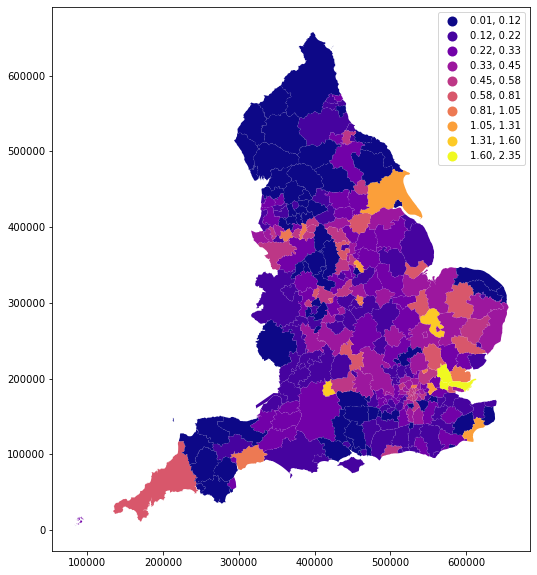

In [165]:
gdf_p_region.plot(column='P_Mean', cmap='plasma', 
         scheme='FisherJenks', k=10, edgecolor='None', legend=True, figsize=(10,10));

# Merge N and LAD

In [166]:
pointInPoly = gpd.sjoin(water_n, england_poly_geo, op='within') 

In [167]:
n_region = pointInPoly.groupby(['Region']).agg({'N_mean':'mean'}).reset_index()
cols = n_region.columns.values
cols[0] = 'Region'
cols[1] = 'n_region'
n_region.columns = cols

In [168]:
n_county = pointInPoly.groupby(['County_Code']).agg({'N_mean':'mean'}).reset_index()
cols = n_county.columns.values
cols[0] = 'County_Code'
cols[1] = 'n_county'
n_county.columns = cols

In [169]:
n_local = pointInPoly.groupby(['LAD21CD']).agg({'N_mean':'mean'}).reset_index()
cols = n_local.columns.values
cols[0] = 'LAD21CD'
cols[1] = 'n_local'
n_local.columns = cols

In [170]:
gdf_n_local = pd.merge(england_poly_geo, n_local, left_on='LAD21CD', right_on='LAD21CD', how='left')

In [171]:
gdf_n_county = pd.merge(gdf_n_local, n_county, left_on='County_Code', right_on='County_Code', how='left')

In [172]:
gdf_n_region = pd.merge(gdf_n_county, n_region, left_on='Region', right_on='Region', how='left')

In [173]:
gdf_n_region["N_Mean"] = np.nan

In [174]:
gdf_n_region['N_Mean'].fillna(gdf_n_region['n_local'], inplace=True)

In [175]:
gdf_n_region['N_Mean'].fillna(gdf_n_region['n_county'], inplace=True)

In [176]:
gdf_n_region['N_Mean'].fillna(gdf_n_region['n_region'], inplace=True)

In [177]:
gdf_n_region.to_csv(r'./OUTPUT/N_concentration.csv')

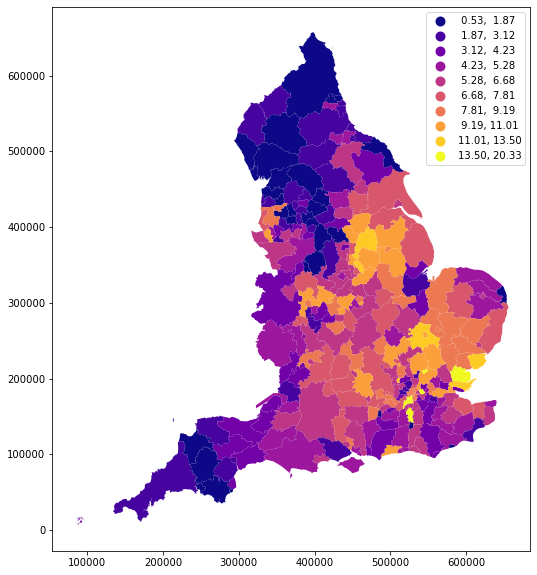

In [178]:
gdf_n_region.plot(column='N_Mean', cmap='plasma', 
         scheme='FisherJenks', k=10, edgecolor='None', legend=True, figsize=(10,10));

# Merge BOD5 with LAD

In [179]:
pointInPoly = gpd.sjoin(water_bod5, england_poly_geo, op='within') 

In [180]:
bod5_region = pointInPoly.groupby(['Region']).agg({'BOD5_mean':'mean'}).reset_index()
cols = bod5_region.columns.values
cols[0] = 'Region'
cols[1] = 'bod5_region'
bod5_region.columns = cols

In [181]:
bod5_county = pointInPoly.groupby(['County_Code']).agg({'BOD5_mean':'mean'}).reset_index()
cols = bod5_county.columns.values
cols[0] = 'County_Code'
cols[1] = 'bod5_county'
bod5_county.columns = cols

In [182]:
bod5_local = pointInPoly.groupby(['LAD21CD']).agg({'BOD5_mean':'mean'}).reset_index()
cols = bod5_local.columns.values
cols[0] = 'LAD21CD'
cols[1] = 'bod5_local'
bod5_local.columns = cols

In [183]:
gdf_bod5_local = pd.merge(england_poly_geo, bod5_local, left_on='LAD21CD', right_on='LAD21CD', how='left')

In [184]:
gdf_bod5_county = pd.merge(gdf_bod5_local, bod5_county, left_on='County_Code', right_on='County_Code', how='left')

In [185]:
gdf_bod5_region = pd.merge(gdf_bod5_county, bod5_region, left_on='Region', right_on='Region', how='left')

In [186]:
gdf_bod5_region["BOD5_Mean"] = np.nan

In [187]:
gdf_bod5_region['BOD5_Mean'].fillna(gdf_bod5_region['bod5_local'], inplace=True)

In [188]:
gdf_bod5_region['BOD5_Mean'].fillna(gdf_bod5_region['bod5_county'], inplace=True)

In [189]:
gdf_bod5_region['BOD5_Mean'].fillna(gdf_bod5_region['bod5_region'], inplace=True)

In [190]:
gdf_bod5_region

,LAD,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,bod5_local,bod5_county,bod5_region,BOD5_Mean
0,E06000001,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53...",NaN,NaN,2.244444,2.244444
1,E06000002,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52...",NaN,NaN,2.244444,2.244444
2,E06000003,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52...",NaN,NaN,2.244444,2.244444
3,E06000004,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52...",NaN,NaN,2.244444,2.244444
4,E06000005,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52...",NaN,NaN,2.244444,2.244444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,E12000007,London,England,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,3.004132,3.004132
346,E12000008,South East,England,South East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,3.354940,3.354940
347,E12000009,South West,England,South West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,86.671151,86.671151
348,E13000001,Inner London,England,London,E13000001,Inner London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,3.004132,3.004132


In [192]:
gdf_bod5_region.to_csv(r'./OUTPUT/BOD5_state.csv')

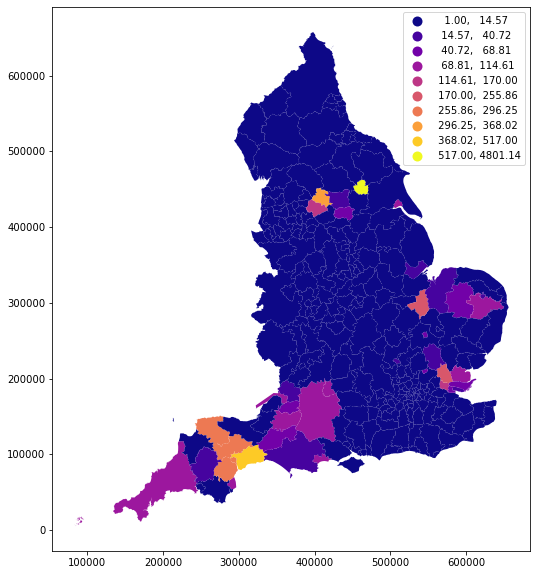

In [191]:
gdf_bod5_region.plot(column='BOD5_Mean', cmap='plasma', 
         scheme='FisherJenks', k=10, edgecolor='None', legend=True, figsize=(10,10));